#                                1.DOWNLOAD THE DATASET

#                             2.LOAD THE DATASET

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data=pd.read_csv(r"C:\IBM PROJECT\abalone.csv")

In [244]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [246]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole weight','Shucked weight':'Shucked_weight','Shucked_weight':'Viscera_weight',
                          'Shell weight':'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#                                 3.PERFORM BELOW VISUALIZATIONS

# UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='Sex', ylabel='Count'>

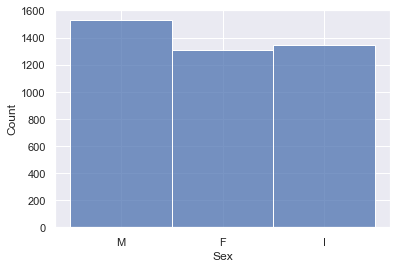

In [247]:
sns.histplot(data['Sex'])

<AxesSubplot:xlabel='Count', ylabel='Height'>

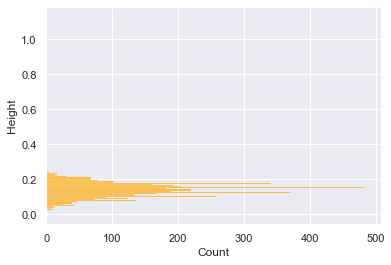

In [248]:
sns.histplot(y=data.Height,color='orange')

# BI-VARIATE ANALYSIS

<AxesSubplot:xlabel='Height', ylabel='Shell_weight'>

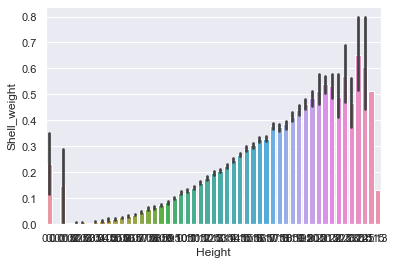

In [250]:
sns.barplot(x=data.Height,y=data.Shell_weight)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

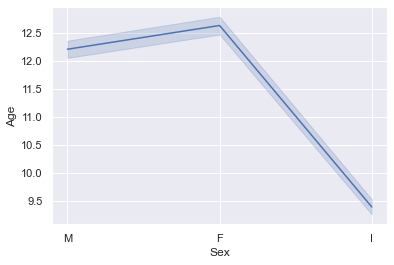

In [251]:
sns.lineplot(x=data.Sex,y=data.Age)

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

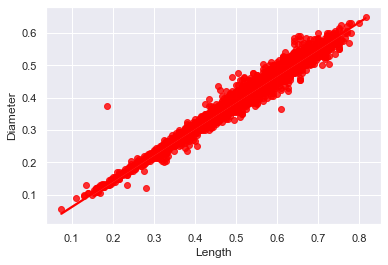

In [252]:
sns.regplot(x=data.Length,y=data.Diameter,color='red')

# MULTI-VARIATE ANALYSIS

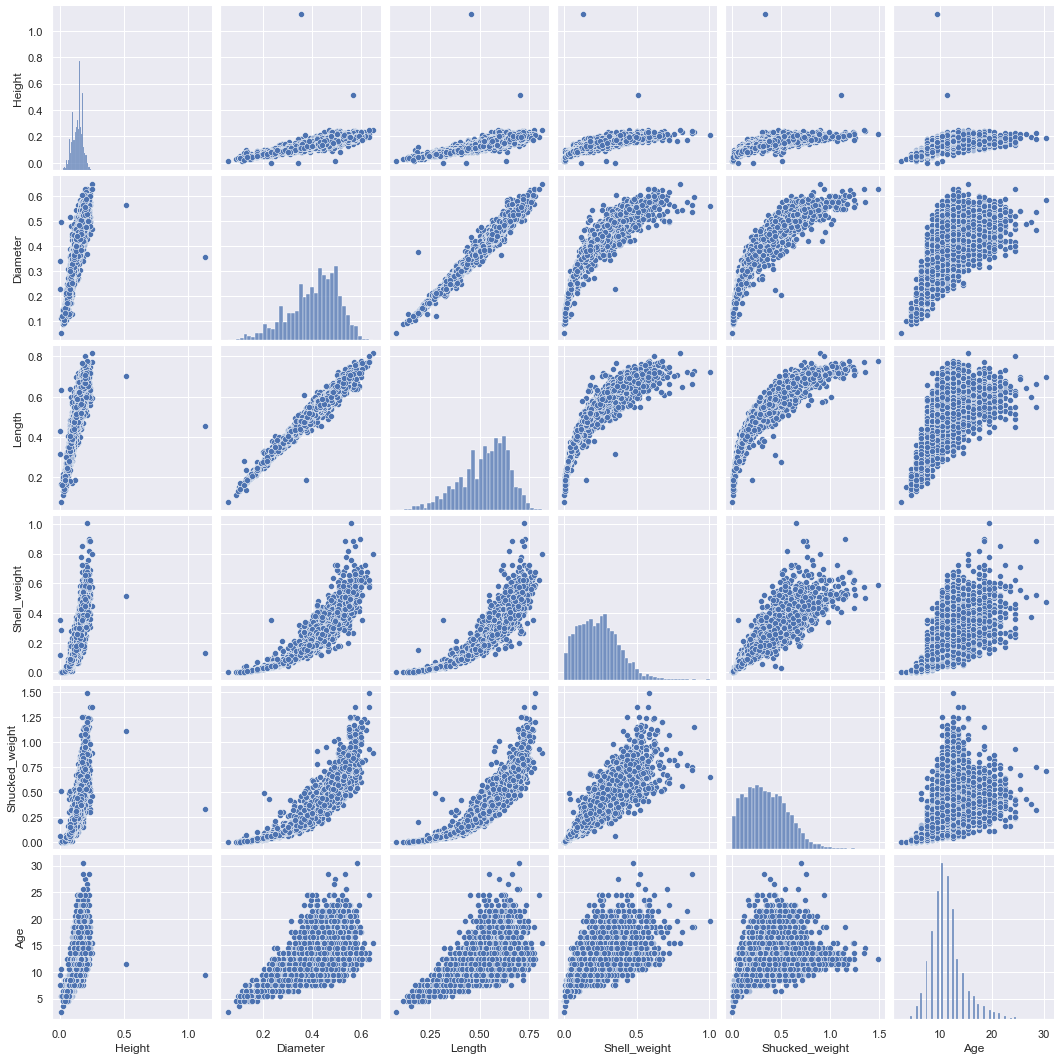

In [253]:
sns.pairplot(data=data[["Height","Diameter","Length","Shell_weight","Shucked_weight","Age"]])

C:\Users\Guna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Height'>

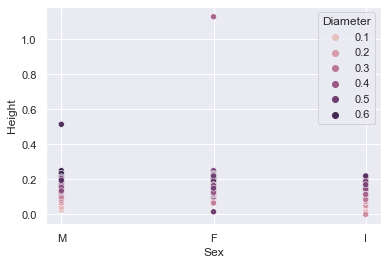

In [254]:
sns.scatterplot(data["Sex"],data["Height"],data["Diameter"],hue=data["Shell_weight"])
                                                                

# 4.PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [255]:
data.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000


# 5.CHECK FOR MISSING VALUES AND DEAL WITHTHEM

In [256]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked_weight    False
Viscera weight    False
Shell_weight      False
Age               False
dtype: bool

# 6.FIND THE OUTLIERS AND REPLACE THEM OUTLIERS

In [257]:
outliers=data.quantile(q=(0.20,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0.20,0.425,0.325,0.105,0.366,0.157,0.0765,0.1091,8.5
0.75,0.615,0.480,0.165,1.153,0.502,0.2530,0.3290,12.5


In [258]:
a=data.Age.quantile(0.25)
b=data.Age.quantile(0.75)
c=b-a
lower_limit=a - 1.5 * c
data.median(numeric_only=True)


Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked_weight     0.3360
Viscera weight     0.1710
Shell_weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

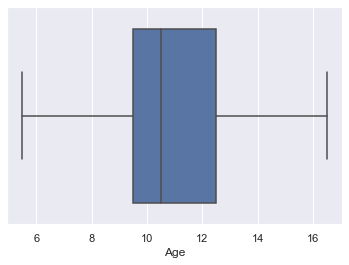

In [259]:
data['Age'] = np.where(data['Age'] < lower_limit,7,data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

# 7.CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [260]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [261]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 8.SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [262]:
y = data["Sex"]
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int32

In [263]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# 9.SCALE THE INDEPENDENT VARIABLES.

In [264]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


# 10.SPLIT THE DATA INTO TRANING AND TESTING. 

In [265]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_Scaled,y,test_size=0.2,random_state=0)

In [266]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [267]:
X_Train.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [268]:
X_Test.head()

,Length,Diameter,Height,Whole weight,Shucked_weight,Viscera weight,Shell_weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.953617
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.606915
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.329404
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.543234
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.641511


In [269]:
Y_Train.head

<bound method NDFrame.head of 3141    1
3521    1
883     2
3627    2
2106    2
       ..
1033    2
3264    0
1653    2
2607    0
2732    1
Name: Sex, Length: 3341, dtype: int32>

In [270]:
Y_Test.head()

668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int32

# 11.BUILD THE MODEL. 

In [271]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')


In [272]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [273]:
y_predict=model.predict(X_Test)

In [274]:
y_predict_train = model.predict(X_Train)

# 12.TRAIN THE MODEL.

In [275]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [276]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9814426818317868


# 13.TEST THE MODEL.

In [277]:
print('Training accuracy: ',accuracy_score(Y_Test,y_predict))

Training accuracy:  0.5370813397129187


# 14.MEASURE THE PERFORMANCE USING METRICS.

In [278]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,115,29,105
1,38,210,43
2,122,50,124


In [280]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       249
           1       0.73      0.72      0.72       291
           2       0.46      0.42      0.44       296

    accuracy                           0.54       836
   macro avg       0.53      0.53      0.53       836
weighted avg       0.54      0.54      0.54       836

